---

<h1><center>SDSE Homework 3 <br><br> Problem 2: Principal Components Analysis </center></h1>
<h3><center>By Pavan M. Reddy [worked with Joshua Duarte]</h3>
---

In this problem we will use principal components analysis to reduce the number of columns in a dataset. The data consist of `N=100` iid samples of a multivariate random variable with `D=16` components. In other words, 100 measurements from 16 interdependent quantities. Our goal is to use PCA to reduce the number of columns in the matrix to 2.

Please begin by replacing `None` in the next cell with your student id number.

In [1]:
result = {
    'SID': 3038574931 # enter your SID
}

In [2]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pickle

The next cell loads the data and extracts its dimensions. 

In [3]:
with open('data_synthetic.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]

Our first task is exploratory. We want to get a sense of the correlations between the 16 random variables that compose $X$. That is, we want to estimate the correlation matrix. The correlation matrix is a normalized version of the covariance matrix that was defined in lectures. It contains all ones on the diagonal, and the off-diagonal entries are correlation coefficients (also defined in lecture). 

# Sample correlation matrix (not graded)

Numpy's `np.corrcoef` computes the sample covariance matrix of $X$ for a dataset containing samples of $X$. Use it to compute the 16x16 sample correlation matrix for `X`, and then use `plt.imshow` to visualize it.  Can you see which of the columns of `X` might be most correlated with each other?

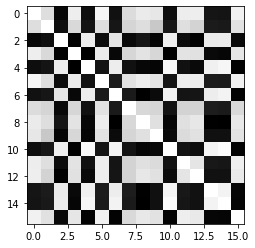

In [7]:
cov = np.corrcoef(X.T) # 16x16
plt.imshow(abs(cov),cmap='gray')
plt.show()

# Seaborn pairplot (not graded)

[Seaborn](https://seaborn.pydata.org/) is a plotting package similar to matplotlib. We don't use it in this course, but it is pretty popular. You can install seaborn into your sdse environment with:

```
conda activate sdse
conda install seaborn
```

One nice thing is its `pairplot` function, which is a visualization of the sample covariance matrix (the matrix containing the correlations between all pairs of columns in `X`). The plot is a 16x16 grid of subplots, in this case because D=16. Below we see the upper-left 4x4 block. The diagonals are histograms of each of the 16 variables. The off-diagonals are scatter plots of the respective column pairs. We can see, for example, that:
+ x0 and x1 are negatively correlated
+ x0 and x2 are uncorrelated
+ x1 and x3 are positevely correlated 

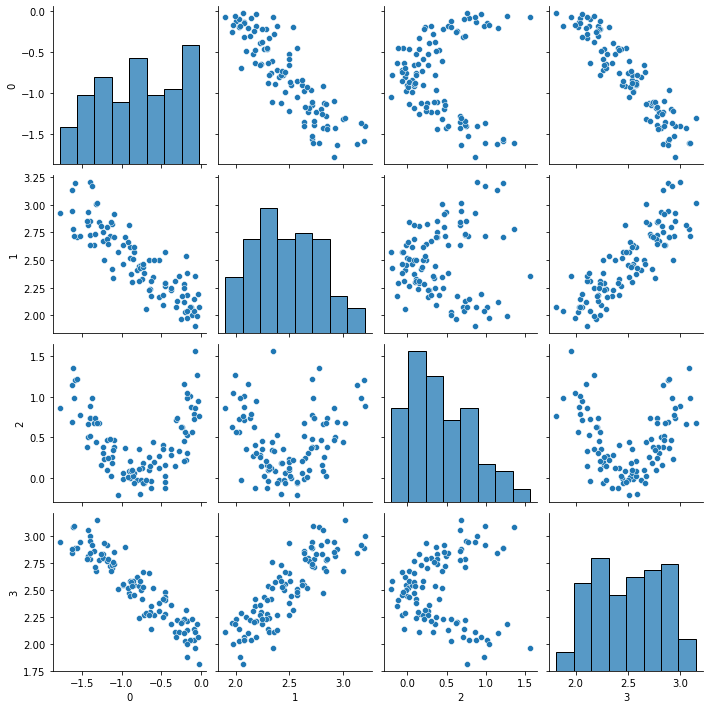

In [8]:
import seaborn as sns
Xdf = pd.DataFrame(X)
sns.pairplot(Xdf.iloc[:,:4])

# 1. Normalize the data
Subtract the mean of each column from `X`. Divide the result by the standard deviation of each column, and record this new matrix as `Xc`.

In [9]:
#normalization
mean = np.mean(X)#calculate the mean
mean_data = X - mean
std = np.std(X, axis = 0)#calculate the standard deviation
Xc = (mean_data/std)

In [10]:
################################
# Reporting. Do not modify.#####
result['Xc'] = Xc    # 2 points
################################

# 2. Run SVD on Xc
This has been done for you in the next cell.

In [11]:
U, s, Vt = np.linalg.svd(Xc)

# 3. Plot the singular values in order
Use `plt.plot` (a semilogy plot is not needed in this case)

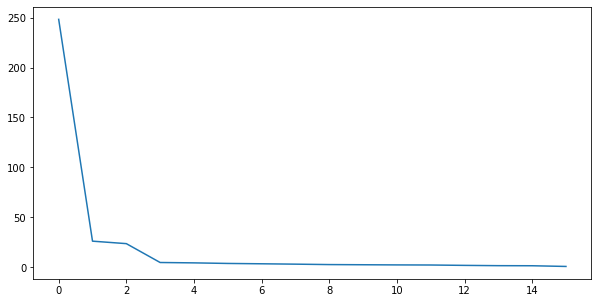

In [12]:
fig3 = plt.figure(figsize=(10,5))
plt.plot(s)
plt.show()

In [13]:
################################
# Reporting. Do not modify.#####
result['fig3'] = fig3    # 4 points
################################

# 4. Plot the total variance explained as a function of the number of dimensions. 
The total variation explained by the rank $\rho$ approximation of `Xc` is the sum of the squares of the first $\rho$ singular values, divided by N. 

$$ \frac{1}{N}\sum_{i=1}^{\rho} \sigma_i^2 $$

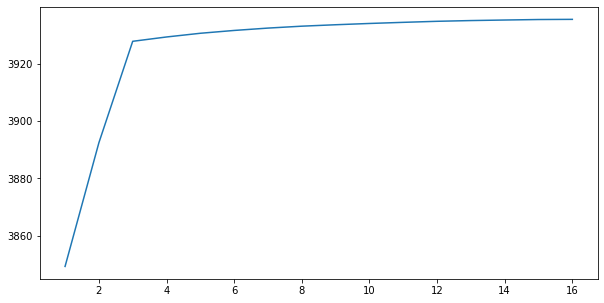

In [16]:
fig4 = plt.figure(figsize=(10,5))
rho = np.arange(1, s.shape[0]+1)
total_var = []
for i in range(len(s)):
    if i==0:
        total_var_curr = s[i]**2/len(s)
    else:
        total_var_curr = total_var[i-1]+s[i]**2/len(s)
    total_var.append(total_var_curr)
plt.plot(rho, total_var)
plt.show()

In [17]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4   # 4 points
################################

# 5. Compute $U_\rho$, $\Sigma_\rho$, and $V^T_\rho$ for $\rho=2$.
Save these to `Urho`, `Srho`, and `Vtrho`. The dimensions of these should be `(100, 2)`, `(2, 2)`, and `(2, 16)` respectively. 

In [25]:
rho = 2
Urho = U[:,:rho]
srho = s[:rho]
Vtrho = Vt[:rho,:]

In [26]:
################################
# Reporting. Do not modify.#####
result['Ur'] = Urho      # 2 points
result['sr'] = srho      # 1 points
result['Vtr'] = Vtrho    # 2 points
################################

# 6. Compute the optimal two-column representation of X

Save the result to `Xrho`. The shape of `Xrho` should be `(100, 2)`

In [27]:
Xrho = (Ur)@np.diag(sr)
Xrho.shape

(100, 2)

In [28]:
################################
# Reporting. Do not modify.#####
result['Xrho'] = Xrho   # 4 points
################################

---
## Do not modify below this

In [30]:
with open('hw3_prob2_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)